In [63]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from string import digits

In [64]:
dataset=pd.read_csv('dev.csv')
dataset.head()

,Description,Category
0,Buses approaching to this place is highly unsafe.,1
1,a man was commenting at me.,1
2,in a share auto,0
3,I was coming out of a club at night with a few...,1
4,One of my friends was molested in the crowd. T...,0


In [65]:
dataset.dtypes

Description    object
Category        int64
dtype: object

In [66]:
dataset['word_count']=dataset['Description'].apply(lambda x:len(str(x).split(" ")))
dataset[['Description','word_count']].head()

,Description,word_count
0,Buses approaching to this place is highly unsafe.,8
1,a man was commenting at me.,6
2,in a share auto,4
3,I was coming out of a club at night with a few...,35
4,One of my friends was molested in the crowd. T...,20


In [67]:
dataset['char_count']=dataset['Description'].str.len()
dataset[['Description','char_count']].head()

,Description,char_count
0,Buses approaching to this place is highly unsafe.,49
1,a man was commenting at me.,27
2,in a share auto,15
3,I was coming out of a club at night with a few...,171
4,One of my friends was molested in the crowd. T...,103


In [68]:
dataset['stopwords']=dataset['Description'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
dataset[['Description','stopwords']].head()

,Description,stopwords
0,Buses approaching to this place is highly unsafe.,3
1,a man was commenting at me.,3
2,in a share auto,2
3,I was coming out of a club at night with a few...,16
4,One of my friends was molested in the crowd. T...,8


In [69]:
dataset['R']=dataset['Description'].apply(lambda x:" ".join(x.lower() for x in x.split()))
dataset['R'].head()

0    buses approaching to this place is highly unsafe.
1                          a man was commenting at me.
2                                      in a share auto
3    i was coming out of a club at night with a few...
4    one of my friends was molested in the crowd. t...
Name: R, dtype: object

In [70]:
dataset['Re']=dataset['R'].str.replace('[^\w\s]','')
dataset['Re'].head()

0     buses approaching to this place is highly unsafe
1                           a man was commenting at me
2                                      in a share auto
3    i was coming out of a club at night with a few...
4    one of my friends was molested in the crowd th...
Name: Re, dtype: object

In [71]:
dataset['Rev']=dataset['Re'].apply(lambda x:" ".join(x for x in x.split() if x not in stopwords.words('english')))
dataset['Rev'].head()

0                buses approaching place highly unsafe
1                                       man commenting
2                                           share auto
3    coming club night friends guys came stopped us...
4    one friends molested crowd happened 9 bridge t...
Name: Rev, dtype: object

In [72]:
a=dataset['Rev'].values
a

array(['buses approaching place highly unsafe', 'man commenting',
       'share auto',
       'coming club night friends guys came stopped us asked quotkya rate haiquot shooed away kept following us',
       'one friends molested crowd happened 9 bridge thane railway station',
       'travelling metro heading college guy standing next tried come closer even gave indecent looks',
       'guy masturbating roadside ogling bus touching inappropraitely',
       'travelling red line metro guy continuously staring giving flying kisses weird facial expressions afternoon time',
       'late evening around 730 pm shopping market south extn locality delhi trying look auto go back home traffic peak could get started walking towards flyover hope would get one point patch little deserted lot traffic mysteriously lot passing vehicles started slow near asking directions 2 vehicles realized vehicles single men driving big cars well educated men big cars seeing woman walking road alone 730 could think t

In [73]:
def txt(a):
    string=" "
    for i in a:
        string+=i
    return string
print(txt(a))

 buses approaching place highly unsafeman commentingshare autocoming club night friends guys came stopped us asked quotkya rate haiquot shooed away kept following usone friends molested crowd happened 9 bridge thane railway stationtravelling metro heading college guy standing next tried come closer even gave indecent looksguy masturbating roadside ogling bus touching inappropraitelytravelling red line metro guy continuously staring giving flying kisses weird facial expressions afternoon timelate evening around 730 pm shopping market south extn locality delhi trying look auto go back home traffic peak could get started walking towards flyover hope would get one point patch little deserted lot traffic mysteriously lot passing vehicles started slow near asking directions 2 vehicles realized vehicles single men driving big cars well educated men big cars seeing woman walking road alone 730 could think two things quotshe hookerquotor alone therefore quotavailablequot felt sick vulnerablewee

In [74]:
remove_num=str.maketrans('','',digits)
r=txt(a).translate(remove_num)
r

' buses approaching place highly unsafeman commentingshare autocoming club night friends guys came stopped us asked quotkya rate haiquot shooed away kept following usone friends molested crowd happened  bridge thane railway stationtravelling metro heading college guy standing next tried come closer even gave indecent looksguy masturbating roadside ogling bus touching inappropraitelytravelling red line metro guy continuously staring giving flying kisses weird facial expressions afternoon timelate evening around  pm shopping market south extn locality delhi trying look auto go back home traffic peak could get started walking towards flyover hope would get one point patch little deserted lot traffic mysteriously lot passing vehicles started slow near asking directions  vehicles realized vehicles single men driving big cars well educated men big cars seeing woman walking road alone  could think two things quotshe hookerquotor alone therefore quotavailablequot felt sick vulnerableweek morni

In [75]:
tokens=word_tokenize(r)
tokens[:20]

['buses',
 'approaching',
 'place',
 'highly',
 'unsafeman',
 'commentingshare',
 'autocoming',
 'club',
 'night',
 'friends',
 'guys',
 'came',
 'stopped',
 'us',
 'asked',
 'quotkya',
 'rate',
 'haiquot',
 'shooed',
 'away']

In [76]:
tokens_n=[word for word in tokens if word not in stopwords.words('english')]
tokens_n[:20]

['buses',
 'approaching',
 'place',
 'highly',
 'unsafeman',
 'commentingshare',
 'autocoming',
 'club',
 'night',
 'friends',
 'guys',
 'came',
 'stopped',
 'us',
 'asked',
 'quotkya',
 'rate',
 'haiquot',
 'shooed',
 'away']

In [77]:
count_freq=Counter(tokens_n)
count_freq

Counter({'buses': 6,
         'approaching': 3,
         'place': 47,
         'highly': 1,
         'unsafeman': 1,
         'commentingshare': 1,
         'autocoming': 1,
         'club': 3,
         'night': 24,
         'friends': 43,
         'guys': 52,
         'came': 44,
         'stopped': 23,
         'us': 54,
         'asked': 41,
         'quotkya': 1,
         'rate': 1,
         'haiquot': 1,
         'shooed': 1,
         'away': 31,
         'kept': 18,
         'following': 21,
         'usone': 1,
         'molested': 2,
         'crowd': 9,
         'happened': 41,
         'bridge': 5,
         'thane': 5,
         'railway': 7,
         'stationtravelling': 1,
         'metro': 34,
         'heading': 3,
         'college': 44,
         'guy': 65,
         'standing': 24,
         'next': 20,
         'tried': 57,
         'come': 18,
         'closer': 5,
         'even': 40,
         'gave': 9,
         'indecent': 24,
         'looksguy': 1,
         'masturb

In [78]:
most_freq=count_freq.most_common(40)
most_freq

[('boys', 96),
 ('man', 92),
 ('girl', 88),
 ('started', 81),
 ('bus', 74),
 ('one', 73),
 ('guy', 65),
 ('back', 64),
 ('home', 61),
 ('tried', 57),
 ('men', 55),
 ('us', 54),
 ('guys', 52),
 ('commenting', 51),
 ('near', 49),
 ('boy', 49),
 ('place', 47),
 ('around', 45),
 ('came', 44),
 ('college', 44),
 ('two', 44),
 ('people', 44),
 ('going', 44),
 ('friends', 43),
 ('walking', 43),
 ('asked', 41),
 ('happened', 41),
 ('friend', 41),
 ('took', 41),
 ('even', 40),
 ('girls', 40),
 ('way', 39),
 ('station', 38),
 ('road', 37),
 ('school', 37),
 ('touch', 36),
 ('group', 36),
 ('ran', 35),
 ('metro', 34),
 ('touching', 34)]

In [79]:
string=" "
for word,freq in most_freq:
    string=string+" "+word   

In [80]:
wordcloud_est=WordCloud(width=800,height=800,min_font_size=10)
wordcloud=wordcloud_est.generate(string)

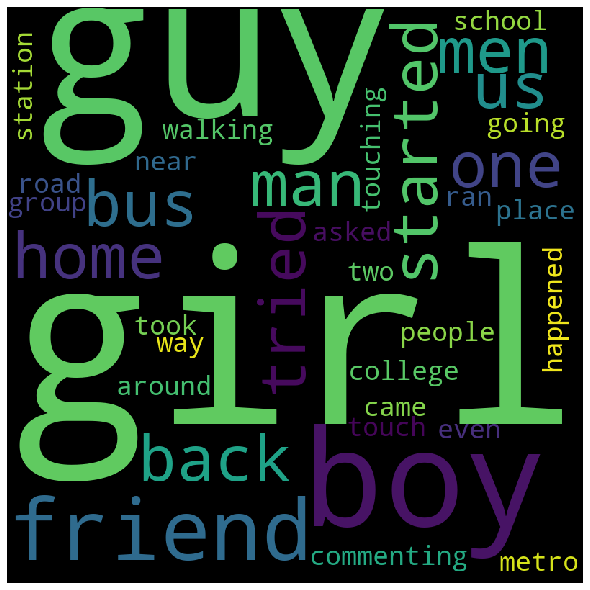

In [81]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [82]:
from wordcloud import WordCloud,STOPWORDS

In [83]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(["took", "way", "touching", "asked", "going", "us","came","via"])

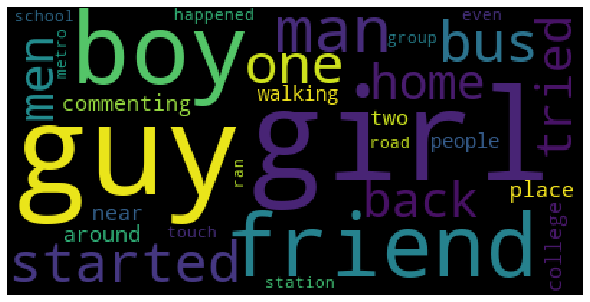

In [84]:
my_cloud = WordCloud(stopwords=my_stopwords).generate(string)
plt.figure(figsize=(8,8))
plt.imshow(my_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
vect = CountVectorizer(max_features=1000)
vect.fit(dataset.Description)
x= vect.transform(dataset.Description)

In [87]:
x_df = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
x_df.head()

,10,11,12,14,15,2013,2014,23,30,45,...,words,work,working,worst,would,wrong,year,years,you,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
y=dataset.Category
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Category, dtype: int64

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y)

In [91]:
logreg=LogisticRegression()

In [92]:
logreg.fit(x_train,y_train)

C:\Users\alliswell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
predictions=logreg.predict(x_test)
predictions

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1], dtype=int64)

In [94]:
logreg.score(x_df,y)

0.8939393939393939